Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
phi = poly.fit_transform(X)
phi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
phi_transposed = phi.T
pinv_manual = np.matmul(linalg.inv(np.matmul(phi_transposed, phi)), phi_transposed)
pinv_np = linalg.pinv(phi)

w = np.matmul(pinv_np, y)
w_manual = np.matmul(pinv_manual, y)

print('Rezultat pinv:', w)
print('Rezultat ručno:', w_manual)

w = w.reshape((w.shape[0], 1))

Rezultat pinv: [2.2        0.45714286]
Rezultat ručno: [2.2        0.45714286]


### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

mean_squared_error: 2.042857142857143
calculated error: [4.08571429]


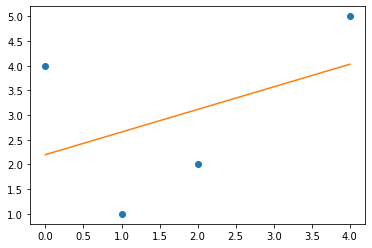

In [5]:
from sklearn.metrics import mean_squared_error

plt.plot(X, y, 'o')

def h(data):
    return w[0][0] + w[1][0] * data

plt.plot(X, h(X))

h = np.matmul(phi, w)
error = mean_squared_error(y, h)
print('mean_squared_error:', error)

def calculate_error(y, h):
    error = 0
    
    for i in range(0, y.shape[0]):
        difference = y[i] - h[i]
        error += difference * difference

    return error / 2

error_manual = calculate_error(y, h)
print('calculated error:', error_manual)

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
try:
    design_inv = linalg.inv(phi)
except linalg.LinAlgError:
    print('Izračun inverza nije uspio.')

Izračun inverza nije uspio.


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
print(reg.coef_, reg.intercept_)

predicitons = reg.predict(X)

error = mean_squared_error(y, predicitons)
print('mean_squared_error:', error)

error_manual = calculate_error(y, predicitons)
print('calculated error:', error_manual)

[0.45714286] 2.2
mean_squared_error: 2.042857142857143
calculated error: 4.085714285714286


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    generated_labels = np.empty((X.shape[0], 1))

    for i, x in enumerate(X):
        generated_labels[i] = f(x) + normal(scale=noise)

    return generated_labels

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
dataset = make_instances(-5, 5, 50)
label_function = lambda x: 5 + x - 2 * x ** 2 - 5 * x ** 3
labels = make_labels(dataset, label_function, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

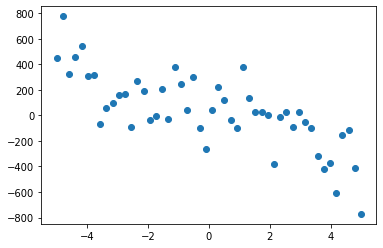

In [11]:
plt.scatter(dataset, labels)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

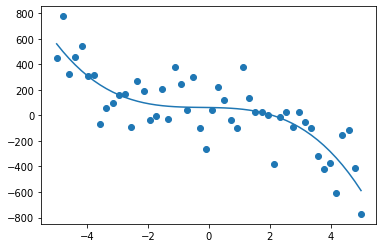

In [12]:
poly2b = PolynomialFeatures(degree=3)
transformed_dataset = poly2b.fit_transform(dataset)
reg2b = np.matmul(linalg.pinv(transformed_dataset), labels)

plt.plot(dataset, np.matmul(transformed_dataset, reg2b))
plt.scatter(dataset, labels)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Pogreška 1. stupnja: 36765.32725347068
Pogreška 2. stupnja: 36211.51753161283
Pogreška 3. stupnja: 28249.005895052225
Pogreška 10. stupnja: 23428.395752150343
Pogreška 20. stupnja: 14450.660234253186


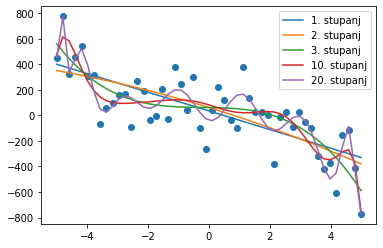

In [13]:
for d in [1, 2, 3, 10, 20]:
    poly3a = PolynomialFeatures(degree=d)
    phi3a = poly3a.fit_transform(dataset)
    reg3a = np.matmul(linalg.pinv(phi3a), labels)
    result3a = np.matmul(phi3a, reg3a)
    plt.plot(dataset, result3a, label=f'{d}. stupanj')
    print(f'Pogreška {d}. stupnja: {mean_squared_error(labels, result3a)}')

plt.scatter(dataset, labels)
plt.legend()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

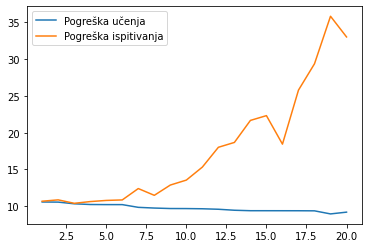

In [14]:
from sklearn.model_selection import train_test_split

X3b_train, X3b_test, y3b_train, y3b_test = train_test_split(dataset, labels, test_size=0.5)

train_errors = []
test_errors = []

for d in range(1, 21):
    poly3b = PolynomialFeatures(degree=d)
    phi3b = poly3b.fit_transform(X3b_train)
    reg3b = np.matmul(linalg.pinv(phi3b), y3b_train)

    result3b_train = np.matmul(phi3b, reg3b)
    train_errors.append(np.log(mean_squared_error(y3b_train, result3b_train)))

    result3b_test = np.matmul(poly3b.fit_transform(X3b_test), reg3b)
    test_errors.append(np.log(mean_squared_error(y3b_test, result3b_test)))

plt.plot(list(range(1, 21)), train_errors, label='Pogreška učenja')
plt.plot(list(range(1, 21)), test_errors, label='Pogreška ispitivanja')
plt.legend()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

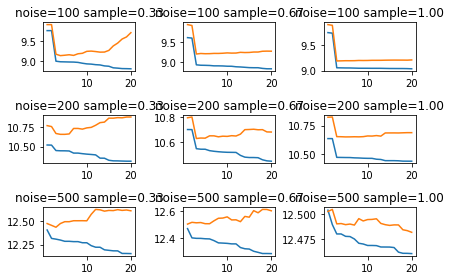

In [15]:
dataset3c = make_instances(-5, 5, 1000)
X3c_train, X3c_test = train_test_split(dataset3c, test_size=0.5)

y3c_train = []
y3c_test = []
noise_levels = [100, 200, 500]

for noise in noise_levels:
    y3c_train.append(make_labels(X3c_train, label_function, noise))
    y3c_test.append(make_labels(X3c_test, label_function, noise))

max_size = 500

f, axarr = plt.subplots(3, 3)
index = 0

for train, test in zip(y3c_train, y3c_test):
    for sample_size in range(1, 4):
        samples = round(max_size * sample_size / 3)

        if samples != max_size:
            indexes = np.random.choice(max_size, samples)

            filtered_train_data = np.array([X3c_train[x] for x in indexes])
            filtered_test_data = np.array([X3c_test[x] for x in indexes])
            filtered_train_labels = np.array([train[x] for x in indexes])
            filtered_test_labels = np.array([test[x] for x in indexes])
        else:
            filtered_train_data = X3c_train
            filtered_test_data = X3c_test
            filtered_train_labels = train
            filtered_test_labels = test

        train_errors = []
        test_errors = []

        for d in range(1, 21):
            poly3c = PolynomialFeatures(degree=d)
            phi3c = poly3c.fit_transform(filtered_train_data)
            reg3c = np.matmul(linalg.pinv(phi3c), filtered_train_labels)

            result_train3c = np.matmul(phi3c, reg3c)
            train_errors.append(np.log(mean_squared_error(filtered_train_labels, result_train3c)))

            result_test3c = np.matmul(poly3c.fit_transform(filtered_test_data), reg3c)
            test_errors.append(np.log(mean_squared_error(filtered_test_labels, result_test3c)))

        axarr[index, sample_size - 1].plot(list(range(1, 21)), train_errors, label='Pogreška učenja')
        axarr[index, sample_size - 1].plot(list(range(1, 21)), test_errors, label='Pogreška ispitivanja')
        axarr[index, sample_size - 1].set_title(f'noise={noise_levels[index]} sample={sample_size / 3:.2f}')
    index += 1

f.tight_layout()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

lambda: 0 w: [ 4.         -5.91666667  3.375      -0.45833333]
lambda: 1 w: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
lambda: 10 w: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


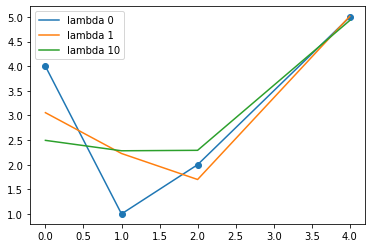

In [16]:
poly4a = PolynomialFeatures(degree=3)
phi4a = poly4a.fit_transform(X)

phi4a_t = phi4a.T
e4a = np.eye(phi4a.shape[0])
e4a[0, 0] = 0
phi_t_phi4a = np.matmul(phi4a_t, phi4a)

for lambda_ in [0, 1, 10]:
    w4a = linalg.inv(phi_t_phi4a + lambda_ * e4a)
    w4a = np.matmul(np.matmul(w4a, phi4a_t), y)
    print(f'lambda: {lambda_} w: {w4a}')
    plt.plot(X, np.matmul(phi4a, w4a), label=f'lambda {lambda_}')

plt.scatter(X, y)
plt.legend()

### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge

phi4b = np.delete(phi4a, 0, 1)

for lambda_ in [0, 1, 10]:
    ridge = Ridge(alpha=lambda_)
    ridge.fit(phi4b, y)
    print(f'lambda: {lambda_} w: {(ridge.intercept_, ridge.coef_)}')

lambda: 0 w: (3.999999999999986, array([-5.91666667,  3.375     , -0.45833333]))
lambda: 1 w: (3.0569614512471652, array([-0.69079365, -0.2831746 ,  0.1445805 ]))
lambda: 10 w: (2.494441843122973, array([-0.15897295, -0.13423067,  0.0815601 ]))


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

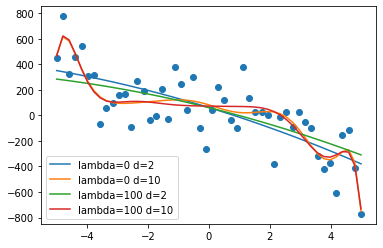

In [18]:
for lambda_ in [0, 100]:
    for d in [2, 10]:
        poly5a = PolynomialFeatures(degree=d)
        phi5a = np.delete(poly5a.fit_transform(dataset), 0, 1)

        ridge5a = Ridge(alpha=lambda_)
        ridge5a.fit(phi5a, labels)

        plt.plot(dataset, ridge5a.predict(phi5a), label=f'lambda={lambda_} d={d}')

plt.scatter(dataset, labels)
plt.legend()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


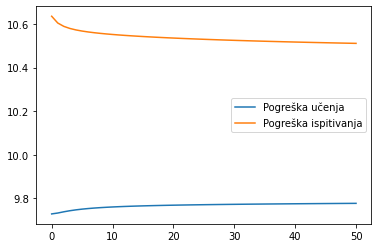

In [19]:
poly5b = PolynomialFeatures(degree=10)
dataset5b = np.delete(poly5b.fit_transform(dataset), 0, 1)
X5b_train, X5b_test, y5b_train, y5b_test = train_test_split(dataset5b, labels, test_size=0.5)

train_errors = []
test_errors = []

for lambda_ in range(0, 51):
    ridge5b = Ridge(alpha=lambda_)
    ridge5b.fit(X5b_train, y5b_train)

    train_errors.append(np.log(mean_squared_error(y5b_train, ridge5b.predict(X5b_train))))
    test_errors.append(np.log(mean_squared_error(y5b_test, ridge5b.predict(X5b_test))))

plt.plot(list(range(0, 51)), train_errors, label='Pogreška učenja')
plt.plot(list(range(0, 51)), test_errors, label='Pogreška ispitivanja')
plt.legend()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

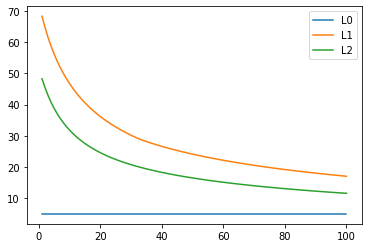

In [21]:
from sklearn.linear_model import Ridge
poly6 = PolynomialFeatures(degree=5)
dataset6 = np.delete(poly6.fit_transform(dataset), 0, 1)
X6_train, X6_test, y6_train, y6_test = train_test_split(dataset6, labels, test_size=0.5)

def calculate_regularisation(model):
    l0, l1, l2 = [], [], []

    for lambda_ in range(1, 101):
        ridge6 = model(alpha=lambda_)
        ridge6.fit(X6_train, y6_train)

        if type(ridge6) is Ridge:
            coef_vector6 = ridge6.coef_[0]
        else:
            coef_vector6 = ridge6.coef_

        l0.append(nonzeroes(coef_vector6))
        l1.append(np.sum(np.abs(coef_vector6)))
        l2.append(np.sqrt(np.sum(coef_vector6 ** 2)))

    plt.plot(list(range(1, 101)), l0, label='L0')
    plt.plot(list(range(1, 101)), l1, label='L1')
    plt.plot(list(range(1, 101)), l2, label='L2')
    plt.legend()

calculate_regularisation(Ridge)

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481.76160350092687, tolerance: 238.8725615466837
  model = cd_fast.enet_coordinate_descent(


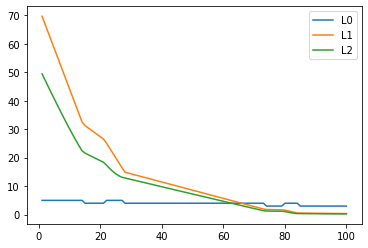

In [22]:
from sklearn.linear_model import Lasso
calculate_regularisation(Lasso)

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

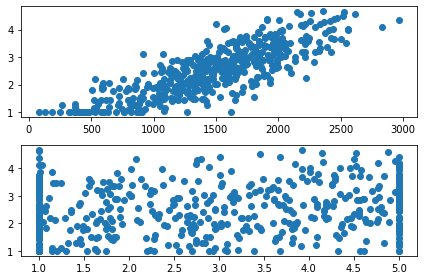

In [24]:
f, axarr = plt.subplots(2, 1)

axarr[0].scatter(exam_score, grades_y)
axarr[1].scatter(grade_in_highschool, grades_y)
f.tight_layout()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [25]:
ridge7 = Ridge(alpha=0.01)
ridge7.fit(grades_X, grades_y)

(ridge7.intercept_, ridge7.coef_)

(0.15061179575776018, array([0.00141497, 0.09477276]))

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X, grades_y)
grades_y_fixed = grades_y

ridge7_fixed = Ridge(alpha=0.01)
ridge7_fixed.fit(grades_X_fixed, grades_y_fixed)

(ridge7_fixed.intercept_, ridge7_fixed.coef_)

(2.5030316359918503, array([0.73954683, 0.13741539]))

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [27]:
grades_X_fixed_colinear = np.concatenate((grades_X_fixed, grades_X_fixed[:, -1:]), axis=1)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [28]:
ridge8a = Ridge(alpha=0.01)
ridge8a.fit(grades_X_fixed_colinear, grades_y_fixed)
(ridge8a.intercept_, ridge8a.coef_)

(2.5030316359918503, array([0.73954673, 0.06870839, 0.06870839]))

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
low_stddev = []
high_stddev = []

def train_ridge(lambda_, X, y):
    ridge8b = Ridge(alpha=lambda_)
    ridge8b.fit(X, y)

    return ridge8b

for i in range(10):
    grades_X_sub, _, grades_y_sub, _ = train_test_split(grades_X_fixed_colinear, grades_y, test_size=0.5)
    ridge8b_low = train_ridge(0.01, grades_X_sub, grades_y_sub)
    ridge8b_high = train_ridge(1000, grades_X_sub, grades_y_sub)

    print(f'Iteracija {i + 1}, lambda 0.01 coef: {ridge8b_low.coef_}, lambda 1000 coef: {ridge8b_high.coef_}')
    low_stddev.append(ridge8b_low.coef_)
    high_stddev.append(ridge8b_high.coef_)

print(f'Standardne devijacije za lambda=0.01: {np.std(low_stddev, axis=0)}')
print(f'Standardne devijacije za lambda=1000: {np.std(high_stddev, axis=0)}')

Iteracija 1, lambda 0.01 coef: [0.71920557 0.05892704 0.05892704], lambda 1000 coef: [0.14890855 0.0345435  0.0345435 ]
Iteracija 2, lambda 0.01 coef: [0.73147134 0.06895112 0.06895112], lambda 1000 coef: [0.14488565 0.02188302 0.02188302]
Iteracija 3, lambda 0.01 coef: [0.73760284 0.06951859 0.06951859], lambda 1000 coef: [0.14611719 0.02461645 0.02461645]
Iteracija 4, lambda 0.01 coef: [0.75435652 0.06779841 0.06779841], lambda 1000 coef: [0.15020984 0.03085084 0.03085084]
Iteracija 5, lambda 0.01 coef: [0.72238097 0.07260145 0.07260145], lambda 1000 coef: [0.14226771 0.02414177 0.02414177]
Iteracija 6, lambda 0.01 coef: [0.74149514 0.0409969  0.0409969 ], lambda 1000 coef: [0.16156482 0.02888502 0.02888502]
Iteracija 7, lambda 0.01 coef: [0.72555863 0.05567666 0.05567666], lambda 1000 coef: [0.14100268 0.02036078 0.02036078]
Iteracija 8, lambda 0.01 coef: [0.73579711 0.06023195 0.06023195], lambda 1000 coef: [0.14653773 0.02787673 0.02787673]
Iteracija 9, lambda 0.01 coef: [0.738382

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.